# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Monopoly game described in the Homework and for which you wrote a Markov chain model:

<img src="monopoly.png" width="300px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* The jail does not prevent the player from continuing to play. In other words, when landing on the “GO TO JAIL” cell, the player jumps back to the “JAIL” cell, but resumes play immediately.

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import numpy.

**Note 2**: Make sure to print the result in the end.

---

In [1]:
import numpy as np

states= ["COLLECT $200", "VERMONT AVENUE", "JAIL", "VIRGINIA AVENUE", "FREE PARKING", "MARVIN GARDENS", "GO TO JAIL", "PENNSYLVANIA AVENUE"]
p = np.array([[0,1/6, 1/6, 1/6, 1/6,1/6,1/6,0], [0,0,1/6,1/6,1/6,1/6,1/6,1/6], [1/6,0,0,1/6,1/6,1/6,1/6,1/6], [1/6,1/6,0,0,1/6,1/6,1/6,1/6], [1/6,1/6,1/6,0,0,1/6,1/6,1/6], [1/6,1/6,1/6,1/6,0,0,1/6,1/6], [0,0,1,0,0,0,0,0], [1/6,1/6,1/6,1/6,1/6,1/6,0,0]])
print(p)

[[ 0.          0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
   0.16666667  0.        ]
 [ 0.          0.          0.16666667  0.16666667  0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.          0.          0.16666667  0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.          0.          0.16666667  0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.          0.          0.16666667
   0.16666667  0.16666667]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.          0.
   0.16666667  0.16666667]
 [ 0.          0.          1.          0.          0.          0.          0.
   0.        ]
 [ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667
   0.          0.        ]]


---

#### Activity 2.

Compute the probability of the following trajectories:

* "COLLECT \$200" - "VERMONT AVENUE" - "GO TO JAIL" - "JAIL"
* "COLLECT \$200" - "GO TO JAIL" - "JAIL" - "COLLECT \$200"
* "COLLECT \$200" - "PENNSYLVANIA AVENUE" - "COLLECT \$200"

**Note:** Make sure to print the result in the end.

---

In [2]:
indexCollect = states.index("COLLECT $200")
indexVermont = states.index("VERMONT AVENUE")
indexGTJail = states.index("GO TO JAIL")
indexJail = states.index("JAIL")
indexPenn = states.index("PENNSYLVANIA AVENUE")

p1 = p[indexCollect][indexVermont] * p[indexVermont][indexGTJail] * p[indexGTJail][indexJail]
print("COLLECT $200 - VERMONT AVENUE - GO TO JAIL - JAIL with probability",p1)

p2 = p[indexCollect][indexGTJail] * p[indexGTJail][indexJail] * p[indexJail][indexCollect] 
print("COLLECT $200 - GO TO JAIL - JAIL - COLLECT $200 with probability",p2)

p3 = p[indexCollect][indexPenn] * p[indexPenn][indexCollect]
print("COLLECT $200 - PENNSYLVANIA AVENUE - COLLECT $200 with probability",p3)

COLLECT $200 - VERMONT AVENUE - GO TO JAIL - JAIL with probability 0.0277777777778
COLLECT $200 - GO TO JAIL - JAIL - COLLECT $200 with probability 0.0277777777778
COLLECT $200 - PENNSYLVANIA AVENUE - COLLECT $200 with probability 0.0


### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

-> The chain is irreducible because any state y can be reached from any other state x, which means that there's a positive probability of visiting y after visiting x.

-> The chain is aperiodic because every state has a period of 1, since gcd(2,3,....) = 1.

-> The chain is ergodic, since it's irreducible, aperiodic and therefore posseses a stationary distribution, eventually reaching it.

---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [3]:
v = np.linalg.eig(p.T)[1][:,0] # We need to transpose the probabilities matrix, since numpy.linalg.eig returns the right eigenvectors
print(v/sum(v)) # We normalize the vector

# A not formal but quick way of checking that this is the stationary distribution would be calculating the matrix power of P
# with a big enough number. We would then see that indeed, P stabilizes in the calculated distribution
# np.linalg.matrix_power(p, 1000)

[ 0.11131135-0.j  0.09350154-0.j  0.21817025-0.j  0.10940316-0.j
  0.10685890-0.j  0.12466872-0.j  0.12731899-0.j  0.10876709-0.j]


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [4]:
currentState = "COLLECT $200"
frequencies = {}
for s in states:
    frequencies[s] = 0

for i in range(10000):
    frequencies[currentState]+=1
    prob_array = p[states.index(currentState)]
    currentState = np.random.choice(states, p=prob_array)
    i+=1

print(frequencies)

{'COLLECT $200': 1107, 'VERMONT AVENUE': 960, 'JAIL': 2175, 'VIRGINIA AVENUE': 1090, 'FREE PARKING': 1082, 'MARVIN GARDENS': 1250, 'GO TO JAIL': 1252, 'PENNSYLVANIA AVENUE': 1084}


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Compare the relative frequencies with the result of Activity #4.

---

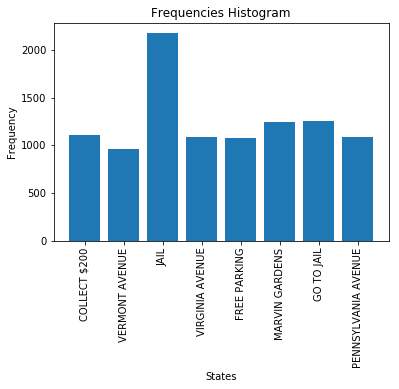

In [5]:
import matplotlib.pyplot as plt

plt.bar(range(len(frequencies)), frequencies.values(), align='center')
plt.xticks(range(len(frequencies)), frequencies.keys(), rotation=90)

plt.xlabel('States');
plt.ylabel('Frequency');

plt.title('Frequencies Histogram');

plt.show()

When we calculate the relative frequencies, dividing the absolute frequencies by 10000, for each state we get values very close to the chain's stationary distribution, which makes sense since 10000 is already a "big" number and can be used to show stable behavior of the Markov Chain.